In [2]:

from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

print(cdc_diabetes_health_indicators.data.headers)

ModuleNotFoundError: ignored

In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
DeepnoteChart(X, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}}}""")

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
#split data set to 66% train (70% train & 30% validation) and 34% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34)

#split the tain set further for valudation.

X_train_data, X_train_valid, y_train_data, y_train_valid = train_test_split(X_train, y_train, test_size=0.30)

print(X_train_data)

        HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
161790       1         1          1   34       1       0   
107724       0         1          1   27       1       0   
177738       0         0          1   24       0       0   
95687        0         0          1   30       0       0   
83887        0         1          1   24       0       0   
...        ...       ...        ...  ...     ...     ...   
127676       0         0          1   27       1       0   
210024       1         1          1   44       0       0   
143078       1         1          1   32       1       0   
102089       1         0          1   33       1       0   
222599       0         0          1   26       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
161790                     0             0       0        1  ...   
107724                     0             1       1        1  ...   
177738                     0             1       1        1  ...   
95687  

In [ ]:
#Use min-max scalin - then hypertune parameters

from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    QuantileTransformer,
    StandardScaler,
)

MM_scaler = MinMaxScaler()
MM_scaler.fit(X_train)
X_train_MinMax = MM_scaler.transform(X_train)
X_test_MinMax = MM_scaler.transform(X_test)

#use min-max scale on all other data parts



In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten
from sklearn.metrics import accuracy_score

# Neural network
model = Sequential()
#Input Layer
model.add(Dense(10, input_dim=21, activation='relu'))
#Hidden Layer 1
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.4))
#Hidden Layer 2
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.4))
#Hidden Layer 3
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.4))
#Hidden Layer 4
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
#Output
model.add(Dense(1, activation='sigmoid'))


opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='CategoricalCrossentropy', optimizer=opt, metrics=['accuracy'])


y_train_arr = y_train['Diabetes_binary'].to_numpy().reshape((-1,1))
#print(y_train_arr)
#print(X_train_MinMax.reshape((-1,1)))
model.fit(X_train_MinMax, y_train_arr, epochs=4)

y_test_arr = y_test.to_numpy()
y_pred = model.predict(X_test_MinMax)

print(y_pred)

print(accuracy_score(y_pred,y_test_arr ))


Epoch 1/4
5233/5233 [==============================] - 27s 5ms/step - loss: 0.0000e+00 - accuracy: 0.8607
Epoch 2/4
5233/5233 [==============================] - 25s 5ms/step - loss: 0.0000e+00 - accuracy: 0.8608
Epoch 3/4
5233/5233 [==============================] - 24s 5ms/step - loss: 0.0000e+00 - accuracy: 0.8608
Epoch 4/4
2696/2696 [==============================] - 7s 3ms/step
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
0.8604785975977368


In [ ]:
#Create Matrix with PCA with at least 80% variance for each one
import numpy as np
from sklearn.decomposition import PCA
c_vals = np.arange(21)

var_ratio_A = []
var_ratio_B = []
var_ratio_C = []
var_ratio_D = []
var_ratio_E = []
for num in c_vals:
  pca = PCA(n_components=num)
  pca.fit(X_train_data_MAS)
  var_ratio_A.append(np.sum(pca.explained_variance_ratio_))

  pca.fit(X_train_data_MM)
  var_ratio_B.append(np.sum(pca.explained_variance_ratio_))

  pca.fit(X_train_data_N)
  var_ratio_C.append(np.sum(pca.explained_variance_ratio_))

  pca.fit(X_train_data_Q)
  var_ratio_D.append(np.sum(pca.explained_variance_ratio_))

  pca.fit(X_train_data_S)
  var_ratio_E.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

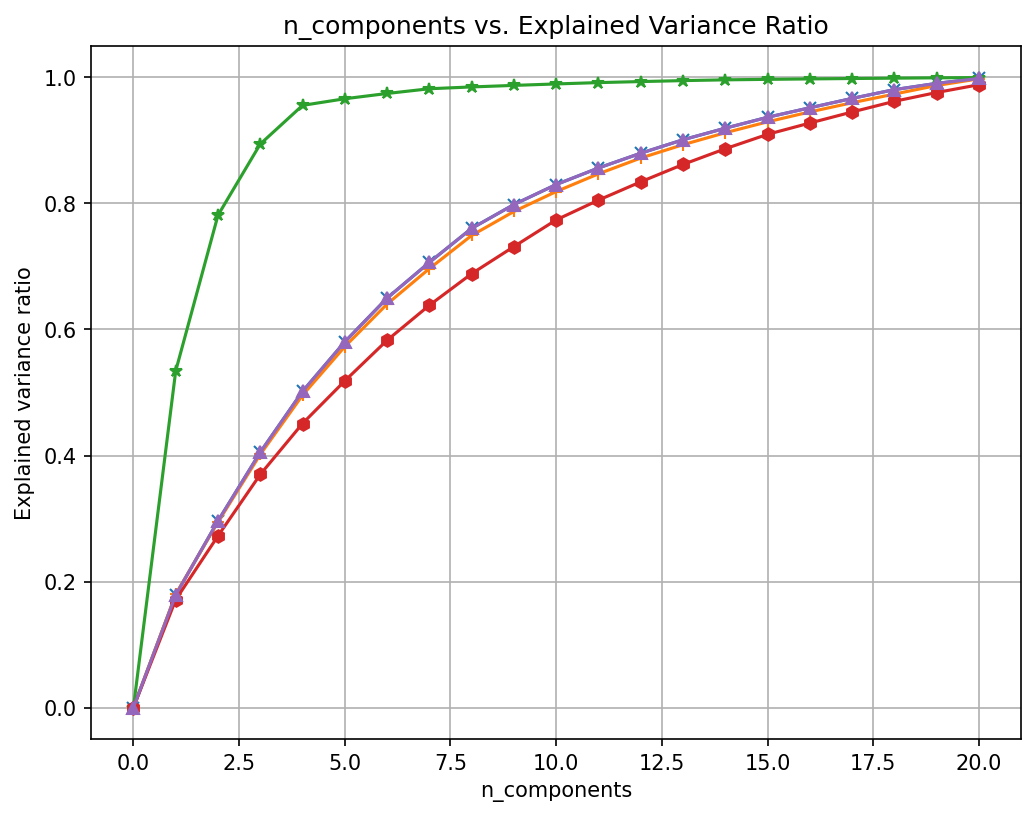

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6),dpi=150)
plt.grid()
plt.plot(c_vals,var_ratio_A,marker='x')
plt.plot(c_vals,var_ratio_B,marker='+')
plt.plot(c_vals,var_ratio_C,marker='*')
plt.plot(c_vals,var_ratio_D,marker='h')
plt.plot(c_vals,var_ratio_A,marker='^')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [ ]:
#Using PCA -> NN
#Figure out which sclars to be used by the data set:

#Try with all scalars
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    QuantileTransformer,
    StandardScaler,
)


#Try A: MaxAbs

MAS_scaler = MaxAbsScaler()
MAS_scaler.fit(X_train_data)
X_train_data_MAS = MAS_scaler.transform(X_train_data)
X_train_valid_MAS = MAS_scaler.transform(X_train_valid)
print(X_train_data_MAS)

#Try B: MinMax

MM_scaler = MinMaxScaler()
MM_scaler.fit(X_train_data)
X_train_data_MM = MM_scaler.transform(X_train_data)
X_train_valid_MM = MM_scaler.transform(X_train_valid)


#Try C: Norm

N_scaler = Normalizer()
N_scaler.fit(X_train_data)
X_train_data_N = N_scaler.transform(X_train_data)
X_train_valid_N = N_scaler.transform(X_train_valid)

#Try D: QuantileTransformer

Q_scaler = QuantileTransformer()
Q_scaler.fit(X_train_data)
X_train_data_Q = Q_scaler.transform(X_train_data)
X_train_valid_Q = Q_scaler.transform(X_train_valid)

#Try E: Standard
S_scaler = StandardScaler()
S_scaler.fit(X_train_data)
X_train_data_S = S_scaler.transform(X_train_data)
X_train_valid_S = S_scaler.transform(X_train_valid)

[[0.         0.         1.         ... 0.30769231 1.         1.        ]
 [0.         0.         1.         ... 0.07692308 0.66666667 1.        ]
 [0.         0.         1.         ... 0.84615385 1.         1.        ]
 ...
 [0.         1.         1.         ... 0.30769231 1.         1.        ]
 [0.         0.         0.         ... 0.61538462 1.         1.        ]
 [0.         0.         1.         ... 0.38461538 0.66666667 0.875     ]]


In [ ]:
#PCA: Norm - 3 PC, MinMax, AbsMax, Stand 10 PC,Qunat - 11 PC

import plotly.express as px


pca = PCA(n_components=9)
components = pca.fit_transform(X_train_data_MM)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(6),
    color=y_train_data['Diabetes_binary']
)
fig.update_traces(diagonal_visible=False)
fig.show()

NameError: name 'PCA' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d80372dc-ad66-4001-9e67-1bdc7759e388' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>